In [1]:
%matplotlib inline
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

In [2]:
re_unemp_california = pd.read_csv('data/new_cali.csv')
re_unemp_california['state'] = "California"
re_unemp_florida = pd.read_csv('data/new_Florida.csv')
re_unemp_florida['state'] = "Florida"
re_unemp_newyork = pd.read_csv('data/newyork.csv')
re_unemp_newyork['state'] = "New York"
re_unemp_texas = pd.read_csv('data/new_Texas.csv')
re_unemp_texas['state'] = "Texas"

re_ca_fl = re_unemp_california.merge(re_unemp_florida, how='outer') 
re_cal_fl_ny = re_ca_fl.merge(re_unemp_newyork, how='outer')
re_unemp = re_cal_fl_ny.merge(re_unemp_texas, how='outer')

re_unemp.head()

,Year,Period,employment,unemployment,unemployment rate,single_home_avg_prices,is_covid,state
0,2010,Jan,15997913,2216607,12.2,291655.4313,0,California
1,2010,Feb,16028580,2233503,12.2,291055.6660,0,California
2,2010,Mar,16061366,2242732,12.3,291133.4774,0,California
3,2010,Apr,16090440,2245213,12.2,291726.8098,0,California
4,2010,May,16112833,2240855,12.2,292800.8509,0,California


In [3]:
# final = re_unemp.drop(columns=['date'])
# final = final.sample(n=300, random_state=1)
# final




In [4]:
X = re_unemp[["employment", "unemployment", "is_covid"]]
y = re_unemp["single_home_avg_prices"].values.reshape(-1, 1)
print(X.shape, y.shape)

(500, 4) (500, 1)


In [5]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [7]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

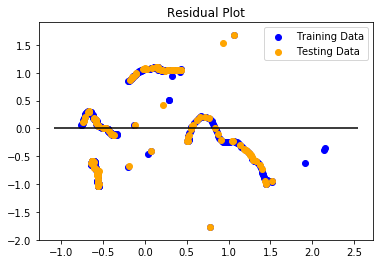

In [9]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5500263144801728, R2: 0.44174444928564627


In [11]:
# LASSO model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = lasso.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5423528894011557, R2: 0.44953268055854545
